# Assignment 3: naive MapReduce
## Contributors

- *Artur Sadurski*
- *Bartłomiej Brzozowski*
- *Jan Wilgosz*
- *Ignacy Nowakowski*

## Table of Contents

1. [Introduction](#Introduction)
2. [Tools and Libraries Used](#Tools-and-Libraries-Used)
3. [Task 1:](#task-1)
4. [Task 2:](#task-2)
5. [Task 3:](#task-3)
6. [Task 4:](#task-4)


## Introduction

This assignment explores fundamental concepts in **Big Data analytics** through a **naive MapReduce** approach. The goal is to implement a **single-server MapReduce model** using Python's `multiprocessing` module, enabling parallel computations on large datasets. The tasks involve working with matrices, processing large-scale text data, computing mathematical constants, and performing matrix multiplications—each designed to demonstrate the efficiency of parallel execution compared to sequential computation.

Each program is designed to run in both **serialized and parallel modes**, with a detailed performance comparison to evaluate the effectiveness of parallel computing. The results provide insight into how **multiprocessing** can enhance performance in data-intensive applications.


## Tools and Libraries Used

The implementation relies on a variety of Python libraries and tools for efficient computation, parallel processing, and data visualization:

- **`numpy`** – Used for generating and manipulating large matrices efficiently.
- **`multiprocessing`** – Implements parallelism to speed up computations using multiple CPU cores.
- **`time`** – Measures execution time for serial and parallel processing comparisons.
- **`matplotlib`** – Creates visual representations of data trends and performance comparisons.
- **`seaborn`** – Enhances visual aesthetics for plotting execution times.
- **`pickle`** – Stores and retrieves processed data efficiently to avoid redundant computations.
- **`collections.Counter`** – Computes word frequencies efficiently for text analysis.
- **`matplotlib.widgets`** – Enables interactive visualization of text processing results.


In [5]:
### Import
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
import pickle
import sys
sys.path.append('/home/artur_176/university/Big_Data/assignment_3/Scripts')
from simulation import test_single_case, simulate_and_plot, simulate_and_plot_matrix, simulate_and_plot_pi

from bbp_pi import compute_pi_serial, compute_pi_parallel
from matrix_multiplication import (
    generate_matrices,
    multiply_np_dot,
    multiply_manual_serial,
    multiply_manual_parallel,
    multiply_numba,
    generate_matrices, 
)
from task2 import plot_histogram

### Task 1

![Description](../Graphics/assignment_3/assignment_3_task_1.png)

## Approach  
- **Serial Execution**: Each row of the matrix is processed one by one.  
- **Parallel Execution**: Rows are distributed across multiple CPU cores using **multiprocessing**, speeding up execution.  
- **Performance Analysis**: Execution time is measured for both approaches, and results are compared.  
- **Simulation & Visualization**: We test the approach on **different matrix sizes** and generate **a performance comparison plot**.

##  Implementation Details  
- **`matrix_processing.py`** – Contains the core functions for serial and parallel counting.  
- **`simulation.py`** – Runs multiple test cases for different matrix sizes and generates performance graphs.  


## Results  
A simulation was conducted on matrices of various sizes, showing at what point **parallel execution** becomes more efficient than serial computation.


In [3]:

test_cases = [
    (10, 10, 500),
    (750, 10, 500),
    (5000, 10, 500)
]

for size, low, high in test_cases:
    print(f"Testing matrix of size {size}x{size}")
    test_single_case(size, low, high)
    print()


Testing matrix of size 10x10
Matrix size: 10x10
Serial execution time: 0.000091 seconds
Parallel execution time: 0.129615 seconds

Testing matrix of size 750x750
Matrix size: 750x750
Serial execution time: 0.124305 seconds
Parallel execution time: 0.141453 seconds

Testing matrix of size 5000x5000
Matrix size: 5000x5000
Serial execution time: 5.376493 seconds
Parallel execution time: 1.052610 seconds



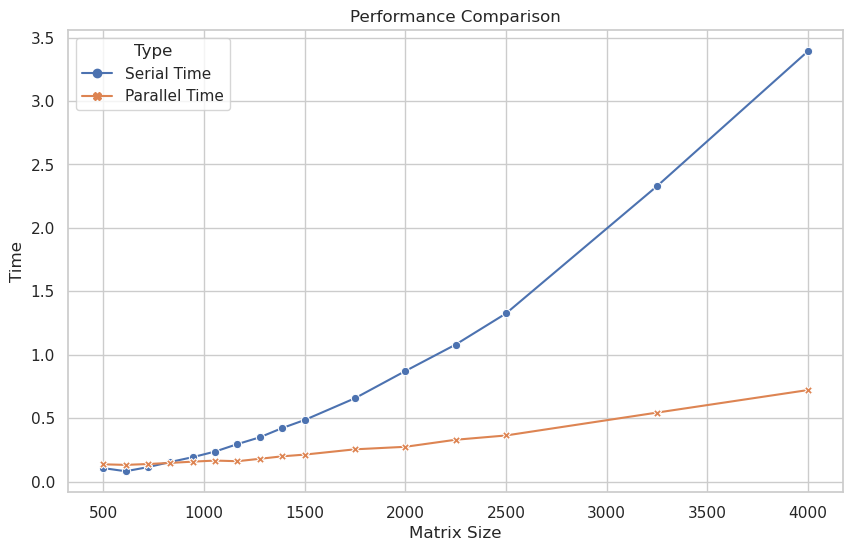

In [4]:
small_sizes = np.linspace(500, 1500, num=10, dtype=int)
medium_sizes = np.linspace(1500, 2500, num=5, dtype=int)
large_sizes = np.linspace(2500, 4000, num=3, dtype=int)

test_cases = np.concatenate((small_sizes, medium_sizes, large_sizes))

simulate_and_plot(test_cases, 10, 500, line_style='-', marker='o')


### Task 2

![Description](../Graphics/assignment_3/assignment_3_task_2.png)

## Approach  
- **Book Downloading**: The script scrapes book IDs from the **Top 100 EBooks** section of the Gutenberg website and downloads them in text format.
- **Serial Processing (`task2.py`)**: Each book is read and processed sequentially.
- **Parallel Processing (`task2.py`)**: Books are processed concurrently using **multiprocessing** to improve efficiency.
- **Result Storage (`task2.py`)**: The computed word frequencies are stored in **pickle files (`results_serial.pkl`, `results_parallel.pkl`)** to avoid redundant computation.
- **Visualization (`task2.py`)**: Loads precomputed word counts and generates a histogram.
- **Performance Comparison**: Execution times for both methods are measured and compared.
- **Interactive Word Filtering**: A real-time search feature allows filtering words dynamically and visualizing results.

## Implementation Details  
- **`download_books.py`** – Downloads and stores books in a local directory.  
- **`task2.py`** – Processes books, counts words (both serially and in parallel), and saves results.  
- **`task2.py`** – Reads `pickle` results and generates word frequency histograms.  
- **`interactive_histogram`** – Implements a real-time word filtering and histogram generation.  



Serial processing time: 4.76 seconds
Parallel processing time: 2.70 seconds


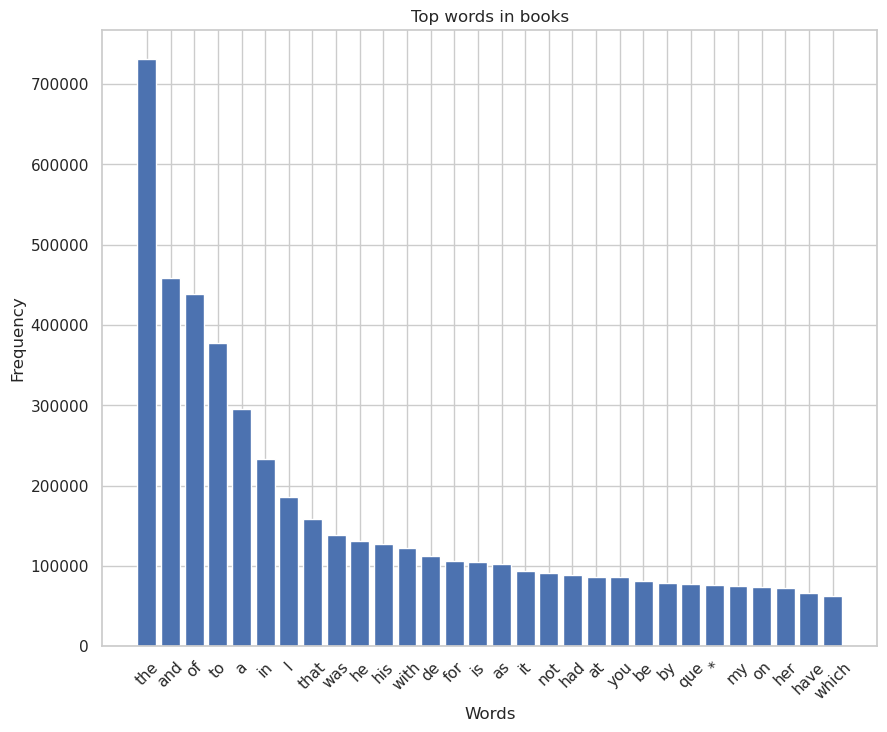

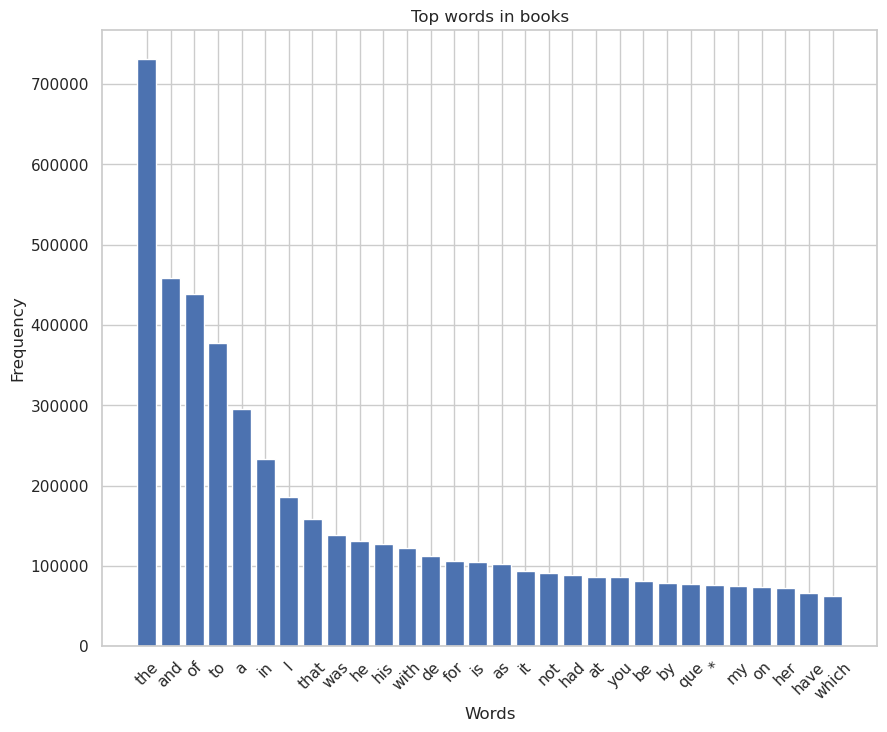

In [8]:
import pickle

serial_path = "/home/artur_176/university/Big_Data/assignment_3/Scripts/results_serial.pkl"
parallel_path = "/home/artur_176/university/Big_Data/assignment_3/Scripts/results_parallel.pkl"

with open(serial_path, "rb") as f:
    total_words_serial, time_serial = pickle.load(f)

with open(parallel_path, "rb") as f:
    total_words_parallel, time_parallel = pickle.load(f)

print(f"Serial processing time: {time_serial:.2f} seconds")
print(f"Parallel processing time: {time_parallel:.2f} seconds")

plot_histogram(total_words_serial)
plot_histogram(total_words_parallel)


Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.11/tkinter/__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "/tmp/ipykernel_178611/215606379.py", line 34, in update_histogram
    filtered_words = filter_words(substr, total_words)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipykernel_178611/215606379.py", line 19, in filter_words
    word: count for word, count in word_counts.items() if substr in word
                                   ^^^^^^^^^^^^^^^^^
AttributeError: 'tuple' object has no attribute 'items'


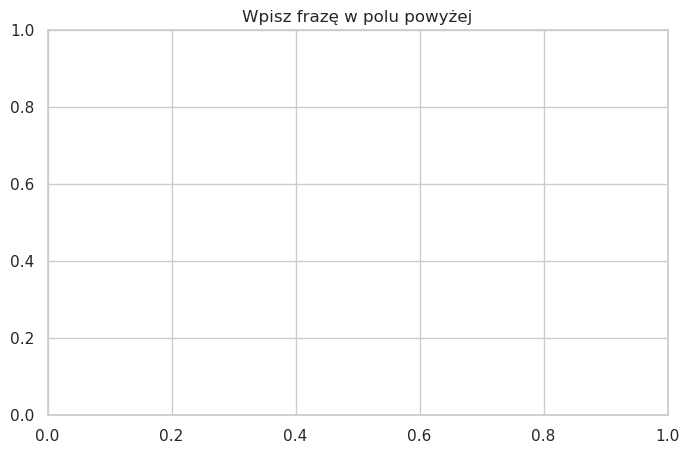

In [ ]:
import tkinter as tk
from tkinter import StringVar
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from collections import Counter
import pickle

serial_path = (
    "/home/artur_176/university/Big_Data/assignment_3/Scripts/results_serial.pkl"
)

with open(serial_path, "rb") as f:
    total_words, _ = pickle.load(f)  # Pobieramy tylko Counter, ignorujemy czas



def filter_words(substr, word_counts, top_n=10):
    """Filtruje słowa zawierające podciąg i zwraca najczęstsze z nich."""
    filtered_words = {
        word: count for word, count in word_counts.items() if substr in word
    }
    return Counter(filtered_words).most_common(top_n)


def update_histogram(*args):
    """Odświeża histogram na podstawie wpisanego tekstu."""
    substr = search_var.get().strip().lower()

    if not substr:
        ax.clear()
        ax.set_title("Wpisz frazę w polu powyżej")
        canvas.draw()
        return

    filtered_words = filter_words(substr, total_words)

    if filtered_words:
        words, counts = zip(*filtered_words)
    else:
        words, counts = [], []

    ax.clear()
    ax.bar(words, counts, color="blue")
    ax.set_xlabel("Words")
    ax.set_ylabel("Frequency")
    ax.set_title(f"Most common words containing '{substr}'")
    ax.tick_params(axis="x", rotation=45)
    canvas.draw()


root = tk.Tk()
root.title("Interactive Word Histogram")
root.geometry("800x600")

search_var = StringVar()
search_var.trace_add("write", update_histogram)

entry = tk.Entry(root, textvariable=search_var, font=("Arial", 14), width=40)
entry.pack(pady=10)

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title("Wpisz frazę w polu powyżej")
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.get_tk_widget().pack()

root.mainloop()


In [ ]:

digits = 100

pi_serial, time_serial = compute_pi_serial(digits)
print(f"Serial π: {pi_serial}")
print(f"Serial execution time: {time_serial:.4f} seconds")

pi_parallel, time_parallel = compute_pi_parallel(digits)
print(f"Parallel π: {pi_parallel}")
print(f"Parallel execution time: {time_parallel:.4f} seconds")



Serial π: 3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679821480865132823066470938350119627942072033649368930652918677481046443747275745835689496799830568544761736733151267272741486104985027818928325160714591810234040646246442204197188786099229982577997759757351180413852848428385458720429147496452791143006014970346744456216180542684845902788229452018556610201990247249604324160073202780007406672652956784102810625981022620582094608736275907191082727422096992367912769436972087225733962993141058535565453887907799231896235042370187642941792463964198537637248562667681447303820308597460130451144081577375146828551955560411223092871939799961814052636658074275070655967919534101623166825849474197101071491956495443876900920563551701226431595382452869286271655094728764648382287501420414824675691367665732821261353223585026072896819408726672133145235581343392577831741025823830929698428457986240552646342322187685993620231053068623917014139186151922

Testing digits: 10
Testing digits: 108
Testing digits: 206
Testing digits: 304
Testing digits: 402
Testing digits: 500
Testing digits: 600
Testing digits: 950
Testing digits: 1300
Testing digits: 1650
Testing digits: 2000
Testing digits: 2500
Testing digits: 5250
Testing digits: 8000


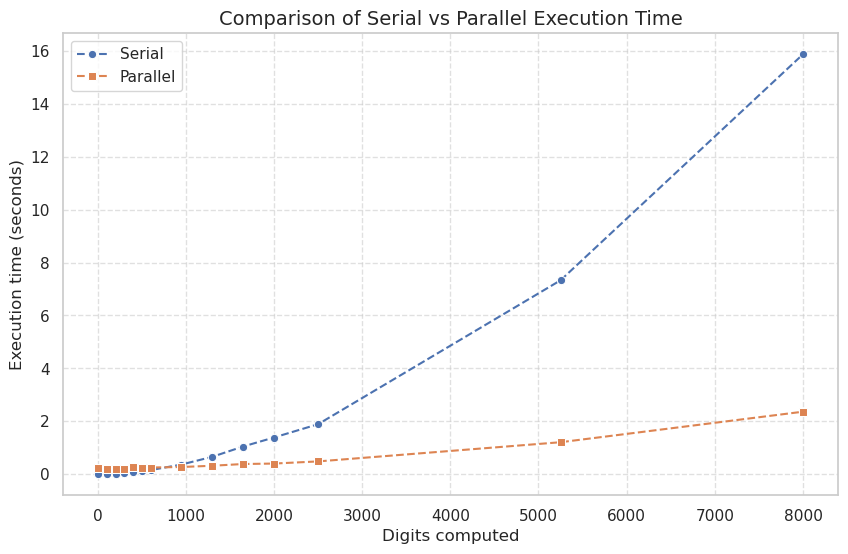

In [ ]:
small_digits = np.linspace(10, 500, 6, dtype=int)
medium_digits = np.linspace(600, 2000, 5, dtype=int)
large_digits = np.linspace(2500, 8000, 3, dtype=int)

test_cases = np.concatenate((small_digits, medium_digits, large_digits))

simulate_and_plot_pi(test_cases)


In [ ]:
sizes = [100, 500]

for size in sizes:
    print(f"\nMatrix size: {size}x{size}")

    A, B = generate_matrices(size)

    _, serial_time = multiply_serial(A, B)
    print(f"Serial execution time: {serial_time:.4f} seconds")

    _, parallel_time = multiply_parallel(A, B)
    print(f"Parallel execution time: {parallel_time:.4f} seconds")



Matrix size: 100x100
Serial execution time: 0.0069 seconds
Parallel execution time: 0.1628 seconds
Speedup from parallel execution: 0.04x

Matrix size: 500x500
Serial execution time: 0.0047 seconds
Parallel execution time: 1.5920 seconds
Speedup from parallel execution: 0.00x


Testing matrix size: 50x50
Testing matrix size: 162x162
Testing matrix size: 275x275
Testing matrix size: 387x387
Testing matrix size: 500x500
Testing matrix size: 600x600
Testing matrix size: 1066x1066
Testing matrix size: 1533x1533
Testing matrix size: 2000x2000
Testing matrix size: 2500x2500
Testing matrix size: 3750x3750
Testing matrix size: 5000x5000


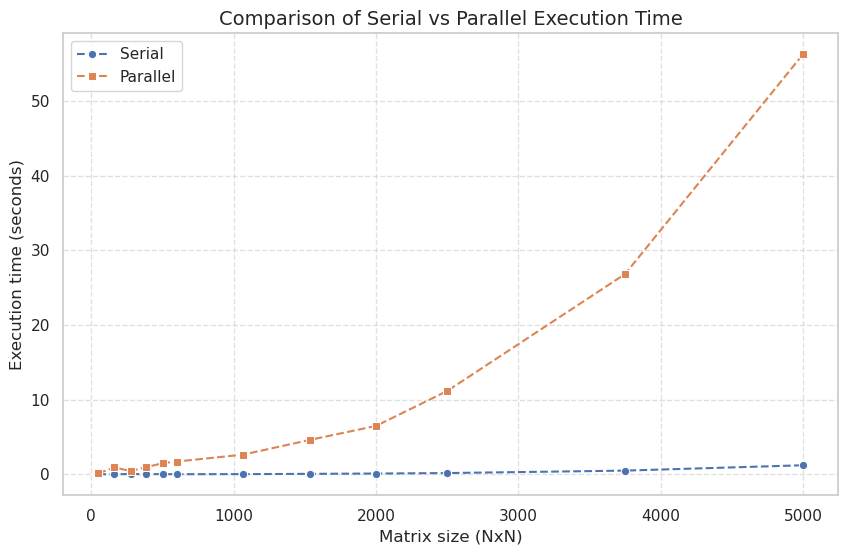

In [ ]:
small_matrices = np.linspace(50, 500, 5, dtype=int)  # Większa gęstość dla mniejszych macierzy
medium_matrices = np.linspace(600, 2000, 4, dtype=int)  # Średnie macierze
large_matrices = np.linspace(2500, 5000, 3, dtype=int)  # Duże macierze

test_cases = np.concatenate((small_matrices, medium_matrices, large_matrices))

simulate_and_plot_matrix(test_cases)

In [ ]:
sizes = [100, 200, 500]

for size in sizes:
    print(f"\nMatrix size: {size}x{size}")

    A, B = generate_matrices(size)

    _, np_time = multiply_np_dot(A, B)
    print(f"NumPy execution time: {np_time:.4f} seconds")

    _, serial_time = multiply_manual_serial(A, B)
    print(f"Manual Serial execution time: {serial_time:.4f} seconds")

    _, parallel_time = multiply_manual_parallel(A, B)
    print(f"Manual Parallel execution time: {parallel_time:.4f} seconds")

    start_time = time.time()
    _ = multiply_numba(A, B)
    numba_time = time.time() - start_time
    print(f"Numba execution time: {numba_time:.4f} seconds")


Matrix size: 100x100
NumPy execution time: 0.0056 seconds
Manual Serial execution time: 0.5096 seconds
Manual Parallel execution time: 0.1622 seconds
Numba execution time: 0.6744 seconds
Speedup (Serial vs Parallel): 3.14x
Speedup (Serial vs Numba): 0.76x
Speedup (NumPy vs Numba): 0.01x

Matrix size: 200x200
NumPy execution time: 0.0084 seconds
Manual Serial execution time: 3.9311 seconds
Manual Parallel execution time: 0.7025 seconds
Numba execution time: 0.0016 seconds
Speedup (Serial vs Parallel): 5.60x
Speedup (Serial vs Numba): 2501.23x
Speedup (NumPy vs Numba): 5.32x

Matrix size: 500x500
NumPy execution time: 0.0054 seconds
Manual Serial execution time: 61.6337 seconds
Manual Parallel execution time: 8.7968 seconds
Numba execution time: 0.0202 seconds
Speedup (Serial vs Parallel): 7.01x
Speedup (Serial vs Numba): 3047.36x
Speedup (NumPy vs Numba): 0.27x


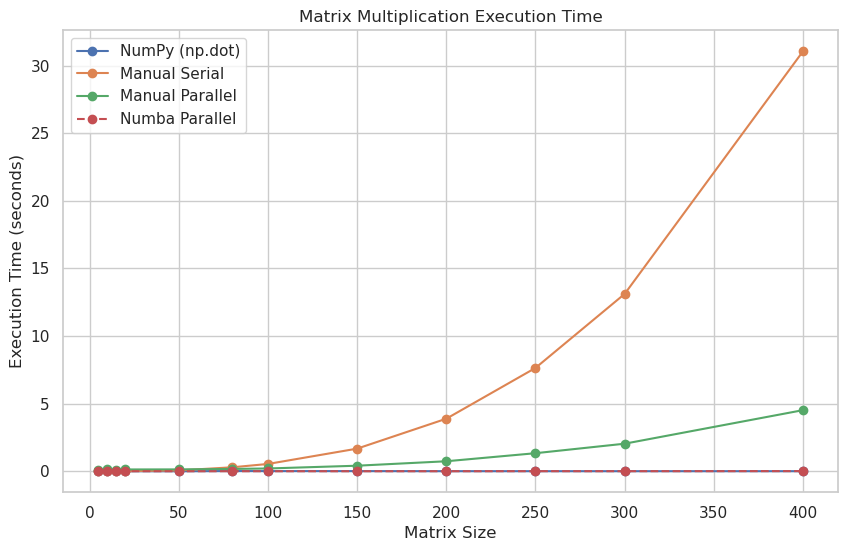

In [ ]:
sizes = [5, 10, 15, 20, 50, 80, 100, 150, 200, 250, 300, 400]
times_np = []
times_serial = []
times_parallel = []
times_numba = []

for size in sizes:
    A, B = generate_matrices(size)

    _, np_time = multiply_np_dot(A, B)
    _, serial_time = multiply_manual_serial(A, B)
    _, parallel_time = multiply_manual_parallel(A, B)

    start_time = time.time()
    _ = multiply_numba(A, B)
    numba_time = time.time() - start_time

    times_np.append(np_time)
    times_serial.append(serial_time)
    times_parallel.append(parallel_time)
    times_numba.append(numba_time)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(sizes, times_np, label="NumPy (np.dot)", marker="o")
plt.plot(sizes, times_serial, label="Manual Serial", marker="o")
plt.plot(sizes, times_parallel, label="Manual Parallel", marker="o")
plt.plot(sizes, times_numba, label="Numba Parallel", marker="o", linestyle="dashed")

plt.xlabel("Matrix Size")
plt.ylabel("Execution Time (seconds)")
plt.title("Matrix Multiplication Execution Time")
plt.legend()
plt.show()
